Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5644 - accuracy: 0.7996 - val_loss: 0.4276 - val_accuracy: 0.8463
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4124 - accuracy: 0.8515 - val_loss: 0.3762 - val_accuracy: 0.8622
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3757 - accuracy: 0.8626 - val_loss: 0.3603 - val_accuracy: 0.8698
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3525 - accuracy: 0.8689 - val_loss: 0.3479 - val_accuracy: 0.8732
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3358 - accuracy: 0.8758 - val_loss: 0.3422 - val_accuracy: 0.8768
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3218 - accuracy: 0.8813 - val_loss: 0.3328 - val_accuracy: 0.8767
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3132 - accuracy: 0.8852 - val_loss: 0.3341 - val_accuracy:

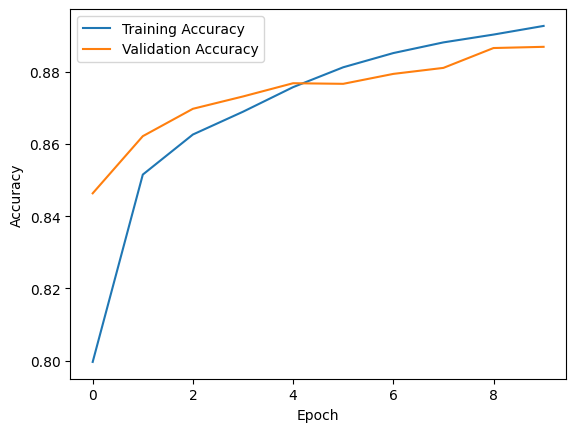

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Memuat dan membagi dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalisasi nilai pixel ke rentang 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Membangun model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten layer untuk mengubah matriks menjadi vektor
model.add(layers.Dense(128, activation='relu'))   # Hidden layer dengan 128 neuron dan aktivasi ReLU
model.add(layers.Dropout(0.2))                   # Dropout layer untuk mengurangi overfitting
model.add(layers.Dense(10, activation='softmax')) # Output layer dengan 10 neuron dan aktivasi softmax

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Akurasi Hasil
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

TUGAS

1. Buat sebuah model klasifikasi sederhana menggunakan TensorFlow untuk data klasifikasi biner. Model tersebut harus memiliki setidaknya satu hidden layer.
2. Lakukan proses pelatihan model tersebut menggunakan data latih selama 10 epoch.
3. Evaluasilah model pada data uji dan cetak hasil akurasi dan kerugian.

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5492 - accuracy: 0.8062 - val_loss: 0.4252 - val_accuracy: 0.8480
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4101 - accuracy: 0.8513 - val_loss: 0.3750 - val_accuracy: 0.8650
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3718 - accuracy: 0.8648 - val_loss: 0.3785 - val_accuracy: 0.8637
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3507 - accuracy: 0.8723 - val_loss: 0.3510 - val_accuracy: 0.8690
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3355 - accuracy: 0.8771 - val_loss: 0.3595 - val_accuracy: 0.8700
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3185 - accuracy: 0.8818 - val_loss: 0.3228 - val_accuracy: 0.8801
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3065 - accuracy: 0.8857 - val_loss: 0.3222 - val_accuracy:

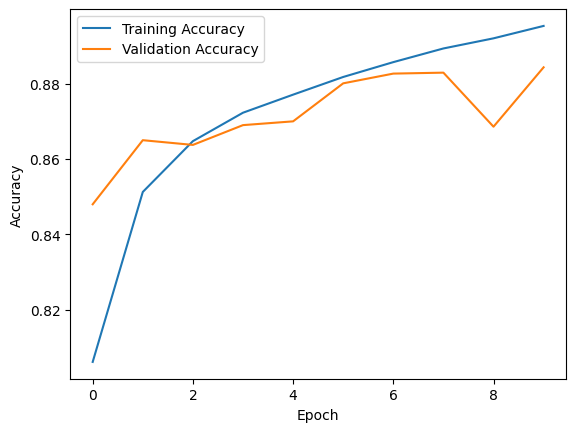

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Memuat dan membagi dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalisasi nilai pixel ke rentang 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Membagi data menjadi data latih dan data uji
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# One-hot encode labels
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

# Membangun model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten layer untuk mengubah matriks menjadi vektor
model.add(layers.Dense(128, activation='relu'))   # Hidden layer dengan 128 neuron dan aktivasi ReLU
model.add(layers.Dropout(0.2))                   # Dropout layer untuk mengurangi overfitting
model.add(layers.Dense(10, activation='softmax')) # Output layer dengan 10 neuron dan aktivasi softmax

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Akurasi Hasil
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
